In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd

In [3]:
%matplotlib inline 

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Styling

In [5]:
sns.set_theme();

# Numerical Plots
- Distribution: Hist, KDE
- Bar plot
- Count plot
- Pacet Plot: Tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
- Box plot: Phương pháp để mổ tả bằng đồ thị các nhóm dữ liệu sống thông qua các phần tử của chúng
- Join plot
- Pair plot
- Heat map: một kĩ thuaajatj trực quan hóa dữ lieju cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

In [6]:
# distribution plot

tips_df = sns.load_dataset('tips')

In [7]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


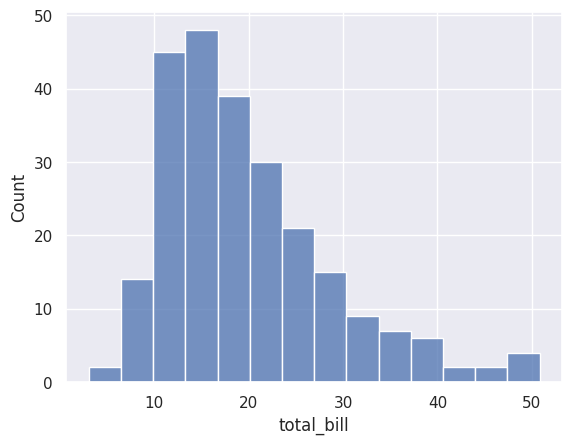

In [8]:
sns.histplot(data=tips_df['total_bill']);

In [9]:
tips_df['total_bill'].value_counts().sort_values(ascending=False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

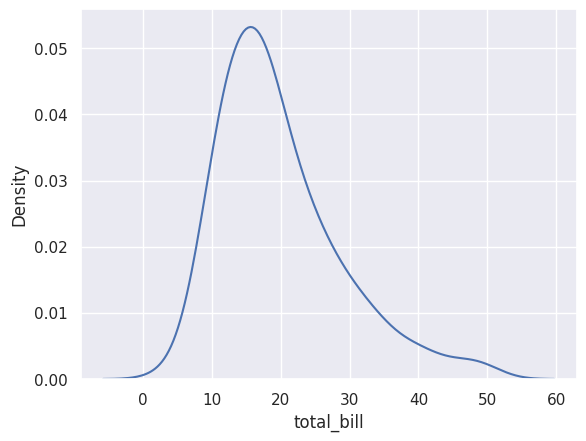

In [10]:
#KDE plot
sns.kdeplot(data=tips_df['total_bill']);

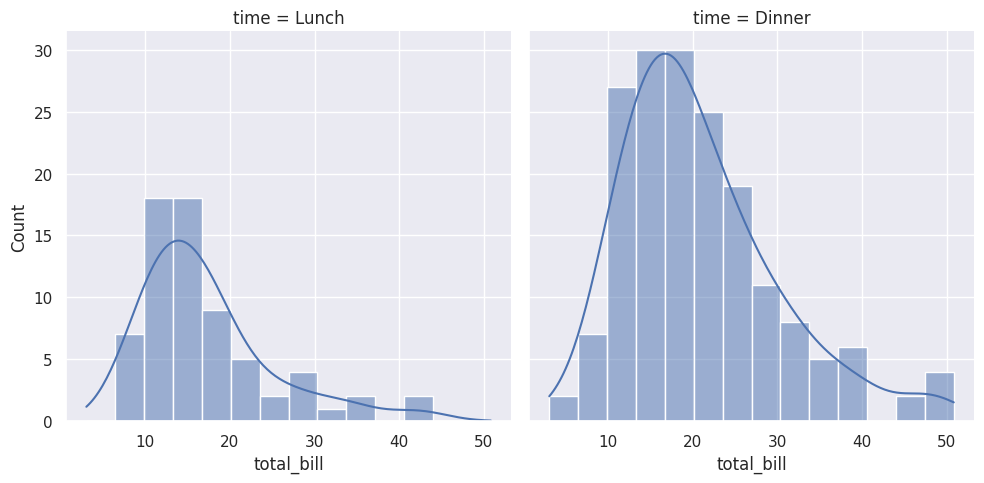

In [11]:
#Displot

sns.displot(data=tips_df, x="total_bill".strip(), col="time", kde=True);


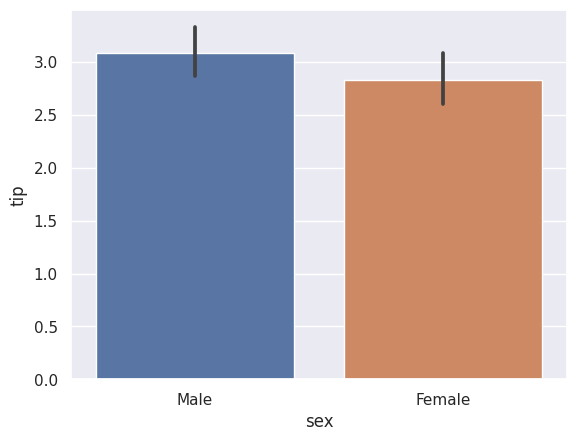

In [12]:
# Bar plot
sns.barplot(data=tips_df, x='sex', y='tip',estimator=np.mean);

In [13]:
tips_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

# Box plot

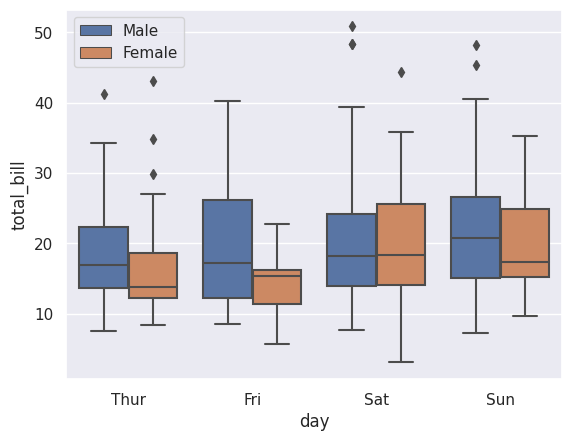

In [14]:
sns.boxplot(data=tips_df, x="day", y="total_bill",hue='sex');
plt.legend(loc=0);

# Facet grid

In [15]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


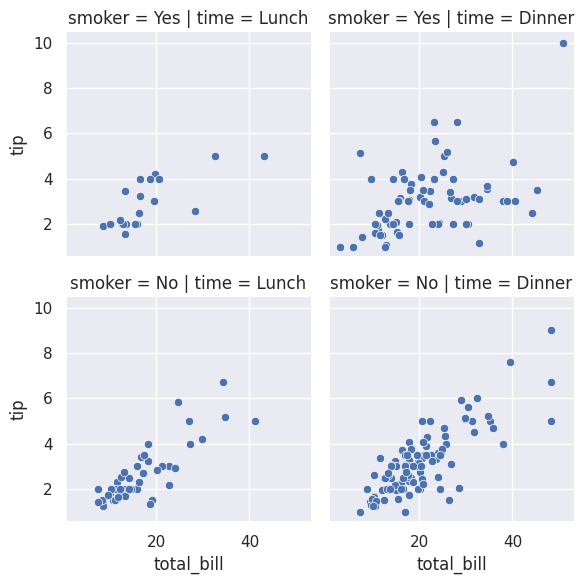

In [16]:
tips_fg = sns.FacetGrid(data=tips_df,row="smoker",col="time"); #Create a class instance
tips_fg.map(sns.scatterplot, "total_bill", "tip");

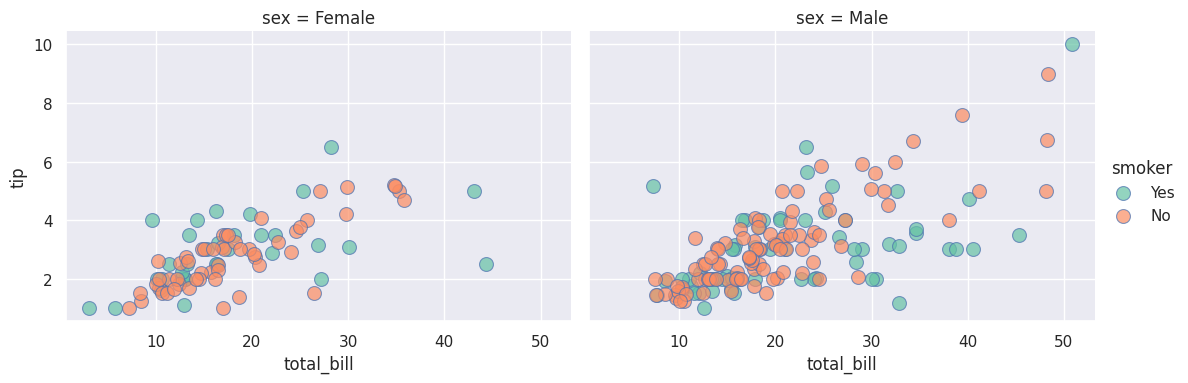

In [17]:
kws = dict(s=100,edgecolor='b',alpha=0.7)
new_fg = sns.FacetGrid(data = tips_df,col='sex',
                       hue = 'smoker',
                       col_order = ['Female','Male'],
                       palette='Set2',
                       height =4 ,
                       aspect = 1.4);

new_fg.map(sns.scatterplot,'total_bill','tip', **kws);

new_fg.add_legend();

# Joint plot

In [18]:
penguins_df= sns.load_dataset("penguins");

In [19]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


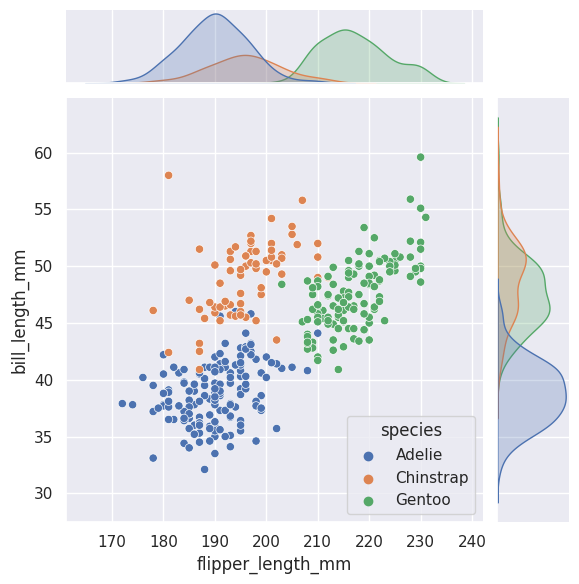

In [20]:
sns.jointplot(data=penguins_df,x ="flipper_length_mm",y="bill_length_mm",hue="species");

# Pair Plots

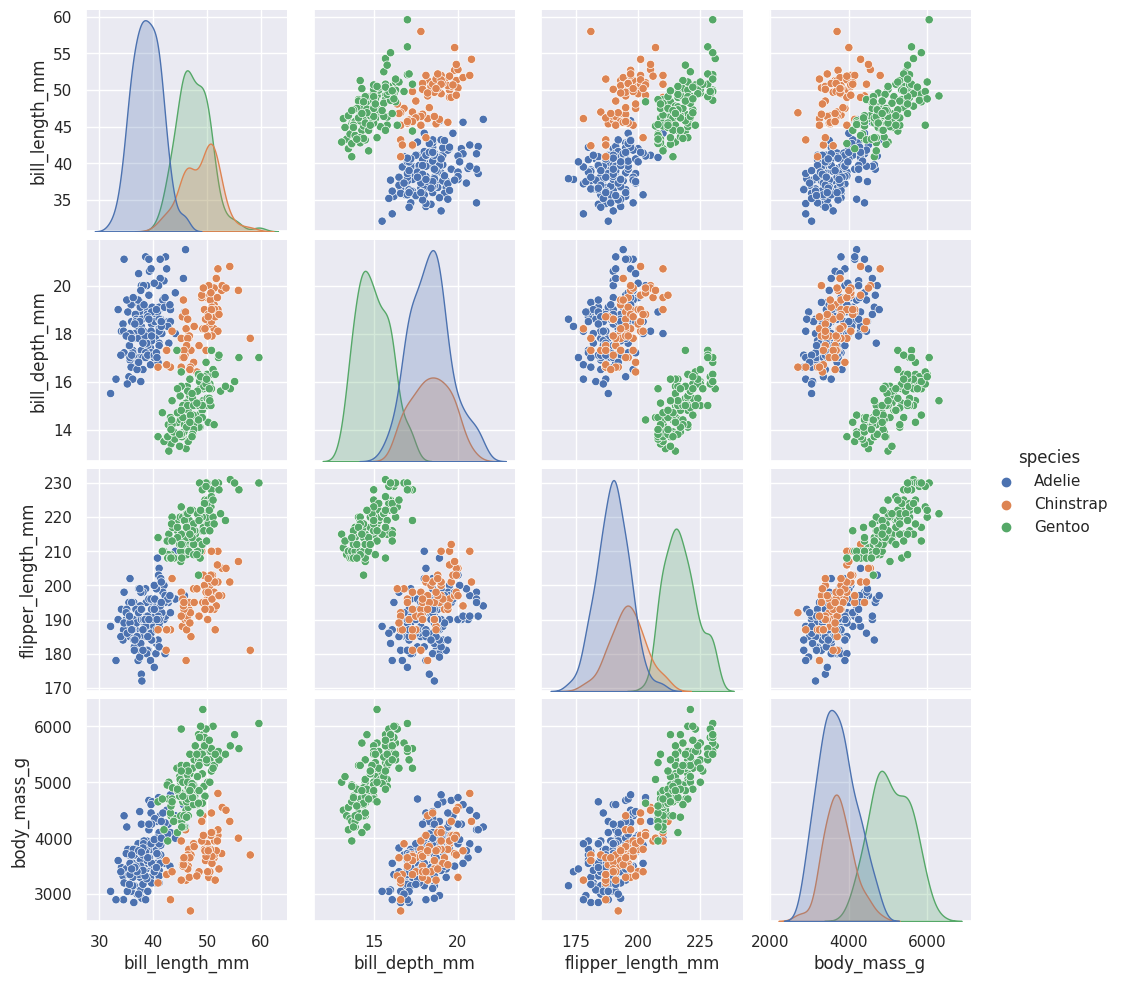

In [21]:
sns.pairplot(data=penguins_df,hue='species');

# Heatmaps

In [24]:
flights_df = sns.load_dataset('flights');

In [26]:
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [30]:
flights = pd.pivot_table(flights_df,index = 'month',columns= 'year',values = 'passengers');

In [31]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


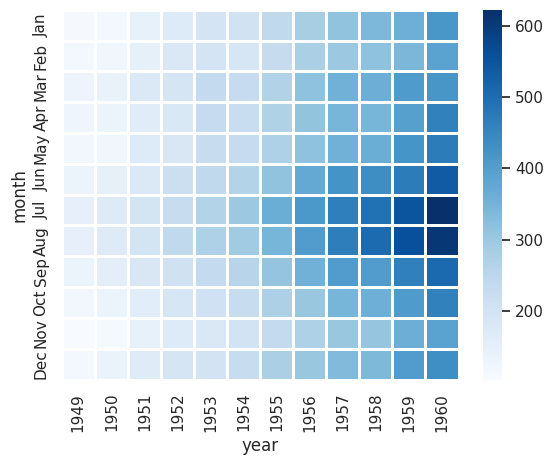

In [36]:
sns.heatmap(data=flights, cmap="Blues", linecolor='white', linewidths=1);

#  Cereal

In [40]:
#Load dataset 
cereal_df=pd.read_csv('./Data/cereal.csv');

In [41]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [44]:
 #irrelevant fields
 
fields = ['shelf','weight','cups','rating'];

cereal_df_new = cereal_df.drop(fields,axis=1);

cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [55]:
#corr() - 
fields1 = ['name','mfr','type'];

cereal_corr = cereal_df_new.drop(fields1,axis=1).corr()
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [56]:
#ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr= np.ones_like(cereal_corr, dtype=bool)
ones_corr 

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [57]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [59]:
#np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

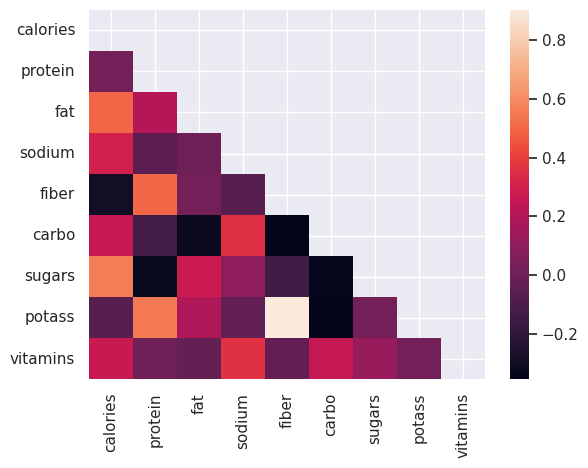

In [63]:
sns.heatmap(data=cereal_corr,mask=mask) ;

In [64]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [65]:
addjusted_cereal_corr = cereal_corr.iloc[1:,:-1]

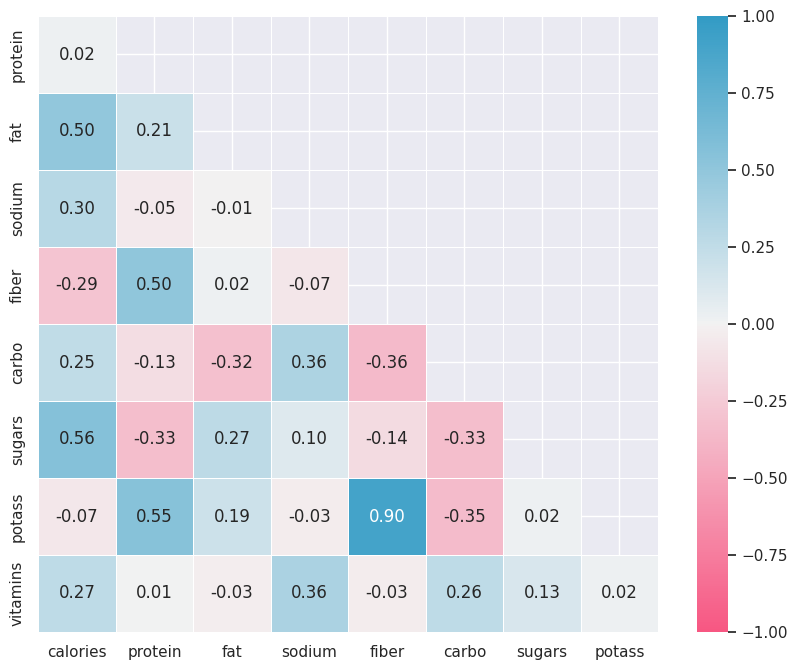

In [80]:
fig,ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(0,230,90,60,as_cmap=True)
sns.heatmap(data=addjusted_cereal_corr,mask=adjusted_mask,
            annot= True,fmt='.2f',cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white',
            linewidths=0.5);

yticks =[i.upper()for i in addjusted_cereal_corr.index]
xticks =[i.upper()for i in addjusted_cereal_corr.columns]

# ax.set_ylabel(yticks,rotation=0)
# ax.set_xlabel(xticks,rotation=90)
title ="Thanh phan dinh duong"
